In [1]:
import pandas as pd
import os
import urllib.request
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = r"C:\Users\student\Documents\Alistair CoAgMET Projects\Pythonstuff\QC"
os.chdir(path)

csv = r"C:\Users\student\Documents\Alistair CoAgMET Projects\Pythonstuff\QC\tempfiles\dailyprecip.csv"

arkCollegiateValley = 'bnv01,sld01'
arkEastValley = 'hly01,hly02,lam01,lam03,lam04,mcl01'
arkMesas = 'cnn01,hne01,pnr01,wcf01'
arkNorthofValley = 'scm01'
arkPlateauSouthofValley = 'wls01'
arkWestValleyBottom = 'avn01,fwl01,ljt01,rfd01'

coFourCorners = 'ctz01,dvc01,mnc01,twc01,yjk01,yuc01'
coHeadwaters = 'gby01,krm01,wfd01'
coLowerGunnison = 'dlt01,ekt01,hot01,mtr01,nwd01,oth01'
coLowerValley = 'bdk01,gyp01,cbl01,frt02,orm01,cbn01,slt01'
coSanJuan = 'drg01,ign01,kln01,pgs01'
coUpperGunnsion = 'gun01'
coYampaWhite = 'clk01,hyd01,mkr01'

ksNorthPlains = 'akr02,hxt01,hyk02,ilf01,pai01,stg01,wry01,yum02'
ksSouthPlains = 'brl02,brl03,idl01,krk01,sbt01,stn01'

pltFrontRangefoothills = 'cpk01'
pltLowerPlains = 'brg01,hxt01,ksy01,ksy02'
pltNorthFrontRange = 'alt01,ftc01,ftc03,gly04,lcn01'
pltNorthPark = 'cow01,heb01,lar01'
pltSouthFrontRagne = 'eac01,flt01,lsl01,pkh01,pkr01'
pltSouthPark = 'bnv01,jfn01,sld01'

rioSanLuisValley = 'bla01,ctr01,ctr02,ljr01,san01'

regions = [arkCollegiateValley,arkEastValley,arkMesas,arkNorthofValley,arkPlateauSouthofValley,arkWestValleyBottom,
           coFourCorners,coHeadwaters,coLowerGunnison,coLowerValley,coSanJuan, coUpperGunnsion, coYampaWhite,
           ksNorthPlains, ksSouthPlains,pltFrontRangefoothills, pltLowerPlains, pltNorthFrontRange, pltNorthPark,
           pltSouthFrontRagne, pltSouthPark, rioSanLuisValley]


In [4]:
def pcpnaccum(self):

    # Creates CSV files using the above defined pathways and then either truncates the existing file to zero length
    # (effectively wiping it clean) or creates a new file
    f = open(csv, "w+")

    # Creates a set of variables that store the current date and the preceding day
    today = datetime.now().strftime("%Y-%m-%d")

    # Calls URLs for desired weather data and stores data in the above defined CSV file paths
    urllib.request.urlretrieve(
        'http://coagmet.colostate.edu/cgi-bin/web_services.pl?type=daily&sids=' + str(self) + '&sdate=2018-10-01&edate=' +
        str(today) + '&elems=pp', filename= csv)
    try:
        # Loads data from the CSV file into a pandas dataframe
        df = pd.read_csv(csv)
    except Exception as e:
        print('Something went wrong while loading the CSVs in dataframes: ' + e.args[0])
    # Closes the CSV file since it is no longer needed
    f.close()
    try:
        # Resets the index of the dataframe
        df = df.reset_index()
    except Exception as e:
        print('Something went wrong while resetting indexes: ' + e.args[0])
    try:
        # Assigns headers to each of the columns in the dataframe
        df.columns.values[0] = 'Station'
        df.columns.values[1] = 'Timestamp'
        df.columns.values[2] = 'Precip'
    except Exception as e:
        print('Something went wrong while labeling the column headers: ' + e.args[0])
    try:
        # Creates a new column that shows the cumulative amount of precip at each station
        df['PrecipAccum'] = df.groupby('Station')['Precip'].cumsum()
    except Exception as e:
        print('Something went wrong while creating the cumulative sum column: ' + e.args[0])
    try:
        plot = sns.lineplot(x='Timestamp',y='PrecipAccum',hue='Station',data=df,palette='colorblind')
        plot.set(xlabel='Date',ylabel='Accumulated Precip')
        title = str('Regional Accumulated Precip')
        plt.title(title)
        plt.show()
    except Exception as e:
        print('Something went wrong while visualizing the data: ' + e.args[0])

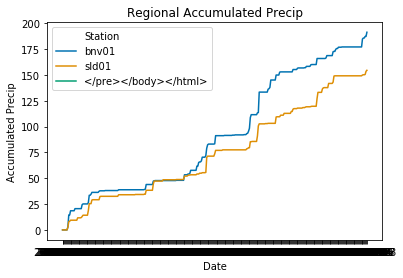

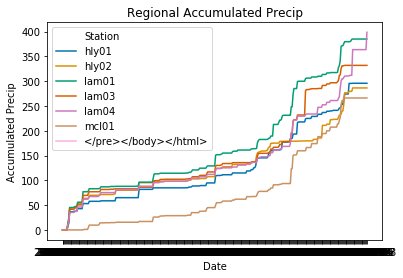

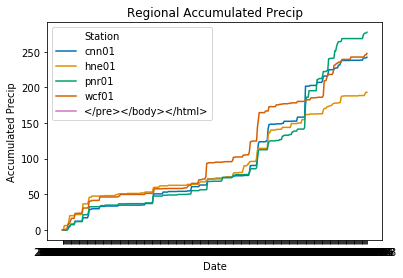

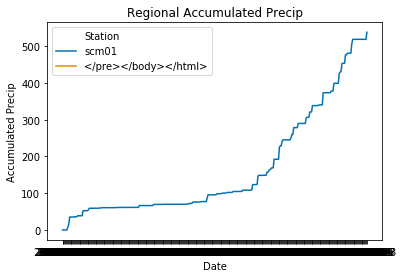

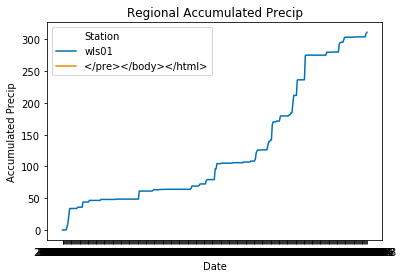

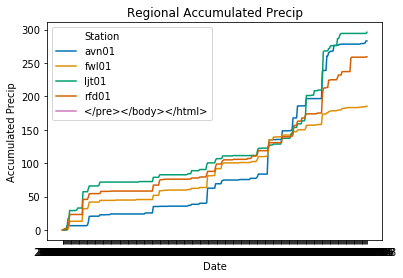

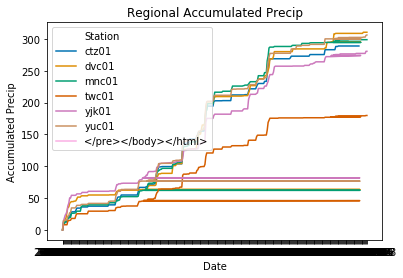

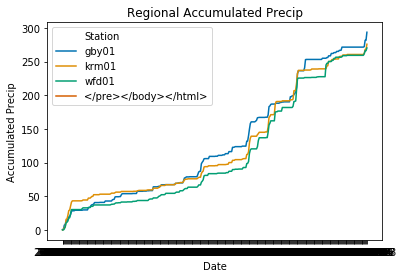

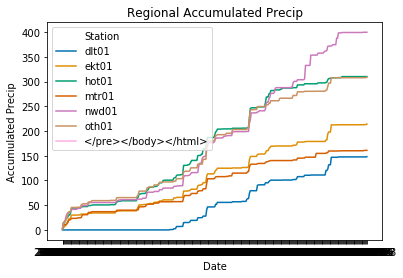

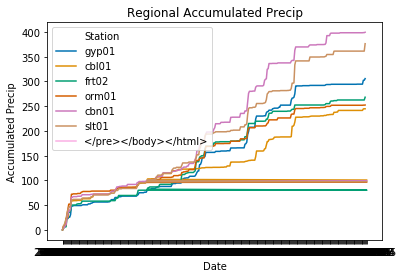

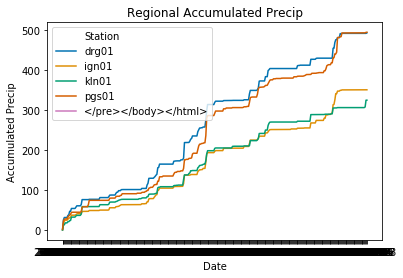

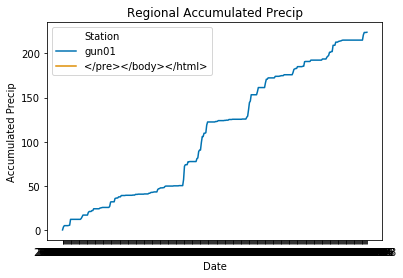

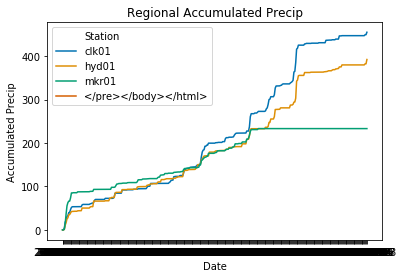

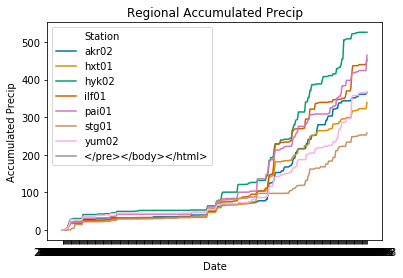

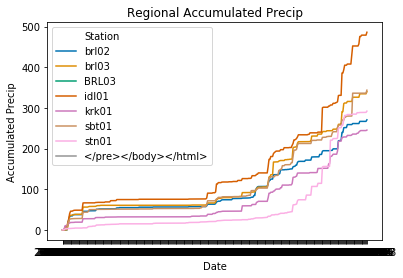

Something went wrong while labeling the column headers: index 2 is out of bounds for axis 0 with size 2
Something went wrong while creating the cumulative sum column: Column not found: Precip
Something went wrong while visualizing the data: Could not interpret input 'PrecipAccum'


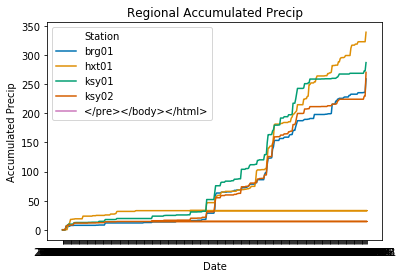

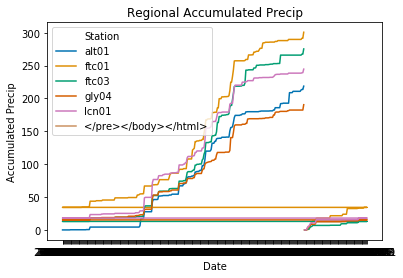

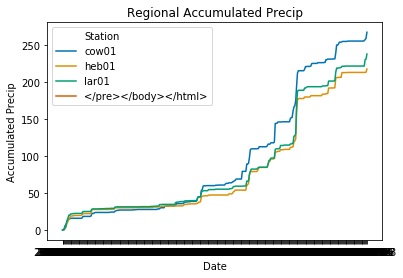

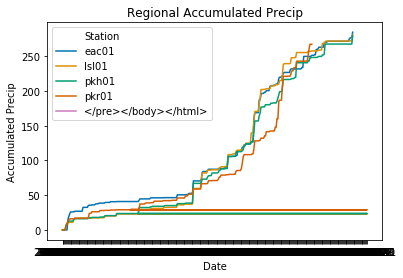

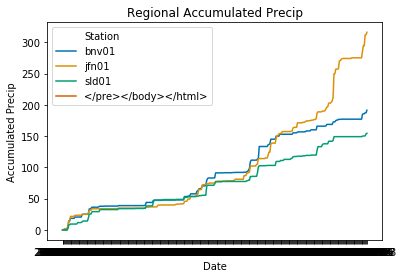

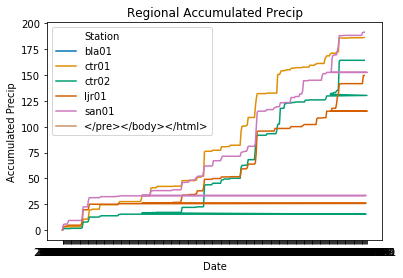

In [5]:
for x in regions:
    pcpnaccum(x)